# IMPLEMENTATION OF A BAYESIAN CLASSIFIER

## BY: Chukwuma Ejieh

#### This  explains the code I used in implementing assignemnt 1 of the Pattern Recognition course and serves as a report.

Firstly, I import all the libraries I need for the implementation in python. Pandas is the library used to load the datasets, Numpy is what is used fo rmost of the array and matrix computations, Matplotlib is for plotting and Random is used to generate random numbers.

In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
from numpy.linalg import inv
from numpy.linalg import det
import matplotlib
import matplotlib.pyplot as plt
import random

#### Clusterincluster Dataset

Loads the data. We start with the clusterincluster.csv dataset.

In [3]:
data_set_path = 'C:\\Users\\Chux\\Desktop\\Datasets for Pattern Recognition\\clusterincluster.csv'

In [4]:
data = pd.read_csv(data_set_path, header = None)

In [5]:
data_array = data.values

Plotting of the data gives the below:

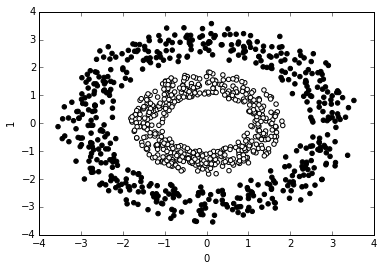

In [6]:
data.plot(x=0, y=1, kind='scatter', c=data[2])

The function below is to get the covariance of the MLE method. It takes in a matrix or array as a parameter and outputs the covariance. It implements the formular:
$$\hat\sum  = 1/n\sum_{k=1}^{n}\left ( x_{k} - \mu  \right )\left ( x_{k} - \mu  \right )^{^{t}}$$

In [7]:
def get_covariance(mat):
    mean = mat.mean(0) #get's the mean of the matrix
    cov_mat = np.empty([2,2])
    for i in range (mat.shape[0]):
        cov_mat = cov_mat + (np.outer((mat[i]-mean),(mat[i]-mean).T))
    return (cov_mat/mat.shape[0])

This function below is used to calculate the mean pf the MLE method. It uses the mean fucntion from the Numpy library and it takes in some
form of matrix or array and gets the mean using the formular:
    $$\mu =1/n\sum_{k=1}^{n}x_{n}$$

In [8]:
def get_mean(np_data):
    return np_data.mean(0)

The function below assigns the dataset into classes. For each entry in the data set, it checks the 3rd value for the class of the dataset. It returns the two arrays for each of the classes in the data set.

In [9]:
def get_training_class (training_data):
    c_one = []
    c_two = []
    for data in training_data:
        if data[2] == 1: #checks the 3rd element to see if the value is 1
            c_one.append(np.array([[data[0]],[data[1]]])) #assigns it to class one if true
        elif data[2] == 2: #checks the 3rd element to see if the value is 2
            c_two.append(np.array([[data[0]],[data[1]]])) #assigns it to class 2 if true
        else:
            pass #doesn't do anything if the 3rd value of that data entry is neither 1 nor 2
    return(np.asarray(c_one), np.asarray(c_two))

This function is used in cross-validating. What it does is that is returns a randomized index from 0-999 every time it is called. So during the 10- cross validation, the training data and testing data are not the same and are randomized at every time. Basically, the way 10-cross validation was implemented is that this function radomizes the data everytime the classifier is called and the training data is the first 900 randomized entry while the test data is the last 100 randomized entry.

In [10]:
def gen_rand_list():
    return random.sample(range(1000), 1000)

This function gets's the test data in the form required to be processed by the classifier. It removes the 3rd column from the data set which has the class of the entry.

In [11]:
def get_test_data (testing_data):
    test_data_array =[]
    for data in testing_data:
        test_data_array.append(np.array([[data[0]],[data[1]]]))
    return (np.asarray(test_data_array))

This function implements the classifier. The inputs go thus:
x: is an entry from the test data represented as an array
cov1 & cov2 : are the covariances of the training data for class one and two respectively
mean1 & mean2; are the means of the training data for class one and two respectively
p1 & p5 = are the probabilities of classes one and two. They are set to 0.5 since the classes are evenly distributed in the dataset.
The classifier is implemented using the formualar of g(x) on slide 48 of lecture 2.
p_class is the predicted class.

In [12]:
def bayes_classifier (x, cov1, cov2, mean1, mean2, p1=0.5, p2=0.5):
    p_class =0
    result = (np.dot(np.dot(x.T,np.subtract(inv(cov2), inv(cov1))),x) + 
            2*(np.dot(np.subtract(np.dot(inv(cov1), mean1), np.dot(inv(cov2), mean2)).T, x)) - 
            np.dot(np.dot(mean1.T, (inv(cov1))), mean1) + 
            np.dot(np.dot(mean2.T, (inv(cov2))), mean2) - 
            (np.log(det(cov1)/det(cov2))) +
            (2 * np.log(p1/p2)))
    if result > 0: #if the result of classification is greater than 0, the predicted class is 1
        p_class =1
    elif result < 0:#if the result of classification is less than 0, the predicted class is 2
        p_class = 2
    else:#if the result of classification is equal to 0, the predicted class is randomly chosen between 1 and 2
        p_class = random.randint(1,2)
    return p_class

The function below gets the metrics used for evaluation. It takes in the predicted classes and the real classes as inputs and outputs 5 evaluation metrics - PPV, NPV, Specificity, Sensitivity, Accuracy. TP means True Positive; TN, True Negative; FP, False Positive; FN, False Negative. Class one is taken as Positive and Class two as Negative.

In [13]:
def get_metrics (predicted, real):
    TP, TN, FP, FN = 0,0,0,0
    n = len(predicted) #len of the test set
    P = len([x for x in real if x==1])#Class one is taken as Positive
    N = len([x for x in real if x==2])#Class two is taken as Negative
       
    for i,j in zip(predicted, real):
        if i == 1 and j == 1:#if the predicted class is 1 and the real class is 1, increase the count of True Positive
            TP +=1
        elif i == 1 and j==2:#if the predicted class is 1 and the real class is 2, increase the count of False Positive
            FP +=1
        elif i==2 and j==2:#if the predicted class is 2 and the real class is 2, increase the count of True Negative
            TN +=1
        elif i==2 and j==1:#if the predicted class is 2 and the real class is 1, increase the count of False Negative
            FN +=1
        else:
            pass
    PPV = TP/float(TP+FP) #PPV is the total TPs divided by the sum of total TPs and NPs. Float is used to avoid rounding up to integers.
    NPV = TN/float(TN+FN) #NPV is the total TNs divided by the sum of total TNs and FNs
    Specificity = TN/float(TN+FP) # Specificity is the total TNs divided by the sum of TNs and FPs
    Sensitivity = TP/float(TP+FN) # Sensitivity is the total TPs divided by the sum of TPs and FNs
    Accuracy = float(TP+TN)/n # Accuracy is the sum of the TPs and TNs divided by the length of the test set.
    return (PPV, NPV, Specificity, Sensitivity, Accuracy)
    
            
        

The function below calls all the earlier defined fucntions to execute them using the dataset. It returns the evaluation metrics as output.

In [14]:
def predict_class(data_array):
    shuffled_data= 0
    train_data = []
    test_data = []
    percent_cut = int((0.9 * len(data_array)))
    predicted_class = []
    shuffled_data = gen_rand_list() #randomly shuffle the dataset
    train_data = [data_array[x] for x in shuffled_data[:percent_cut]] #get the first 900 in the shuffled dataset and use as training data
    test_data = [data_array[x] for x in shuffled_data[percent_cut:]] #get the last 100 as test data
    target = [data[2] for data in test_data ] #gets the 3rd value in each entry of the test data for the purpose of evaluation
    testing_data = get_test_data(test_data) #removes the 3rd value from the test data and prepares the test data for classification
    class_one = get_training_class(train_data)[0] #gets class one
    class_two = get_training_class(train_data)[1] #gets class two
    mean1, mean2 = get_mean(class_one), get_mean(class_two) #gets mean of classes one and two respectively
    cov1, cov2 = get_covariance(class_one), get_covariance(class_two) #gets covariance of classes one and two respectively
    
    for x in testing_data: #for each data entry in the testing data
        predicted_class.append(bayes_classifier(x, cov1, cov2, mean1, mean2, 0.5, 0.5 )) #predict the class of the entry
    
    metrics = get_metrics (predicted_class, target) #evaluate the preicted class against the real targeted class
    
    print ('PPV: {0:.4f}, NPV: {0:.4f}, Specificity: {0:.4f}, Sensitivity: {0:.4f}, Accuracy: {0:.4f}\n'.format 
            (metrics[0], metrics[1], metrics[2], metrics[3], metrics[4])) #print out the evaluation metrics
    
    return metrics
    
                                      
    

The line of code below runs the predict_class function 10 times as part of the 10 cross fold validation. The data is shuffled each time it is run and the value of each evaluation metric is printed in each run. The average is printed out at the end.

In [15]:
def run_data (data_set):
    met1, met2, met3, met4, met5 = 0,0,0,0,0
    for i in range(10):
        print ('Running test number: {0}'.format(i))
        predict = predict_class(data_array)
        met1 += predict[0]
        met2 += predict[1]
        met3 += predict[2]
        met4 += predict[3]
        met5 += predict[4]

    print ('Average PPV: {0:.4f}, Average NPV: {0:.4f}, Average Specificity: {0:.4f}, Average Sensitivity: {0:.4f}, Average Accuracy: {0:.4f}'. 
       format (met1/10, met2/10, met3/10, met4/10, met5/10)) #Prints out the average for each metric
    return None

In [16]:
run_data(data_array)

Running test number: 0
PPV: 0.8431, NPV: 0.8431, Specificity: 0.8431, Sensitivity: 0.8431, Accuracy: 0.8431

Running test number: 1
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 2
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 3
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 4
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 5
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 6
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 7
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 8
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number

##### Discussion 

It can be clearly seen that the classifier predicted all most all the values accurately for each round of the 10 cross validation. It looked too accurate for comfort but I verified the classifier was correct by running it with some sample test data. It is noticed from the plot above that instances with high values belong to class 2 and lower values belong to class 1. So I tested the classifier with outrageusly high instances like [1000, 50000] and low instances like [0.00001, 0.0000005] and it classified the points as class two and one respectively

#### Halfkernel Dataset

The same functions used above will be applied to this dataset too. The only things needed here are the the loading of the data and plotting the data. This go on in the subsequent lines of code.

In [17]:
data2 = pd.read_csv('C:\\Users\\Chux\\Desktop\\Datasets for Pattern Recognition\\halfkernel.csv', header = None)

In [18]:
data_array2 = data2.values

The plot of the data is shown below

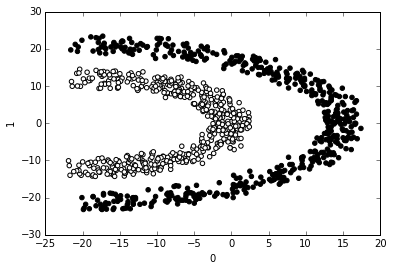

In [19]:
data2.plot(x=0, y=1, kind='scatter', c=data2[2])

In [20]:
run_data(data_array2)

Running test number: 0
PPV: 0.9074, NPV: 0.9074, Specificity: 0.9074, Sensitivity: 0.9074, Accuracy: 0.9074

Running test number: 1
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 2
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 3
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 4
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 5
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 6
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 7
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 8
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number

##### Discussion

The results got here are very similar to the results got in the clusterincluster dataset. The classifier performs very accurately on both datasets so far. I believe this is due that the points from the classes are have clear boundaries on the plot
By tweaking the probabilities of both classes, lower metrics results were achieved though.

#### Twogaussians Dataset

In [21]:
data3 = pd.read_csv('C:\\Users\\Chux\\Desktop\\Datasets for Pattern Recognition\\twogaussians.csv', header = None)

In [22]:
data_array3 = data3.values

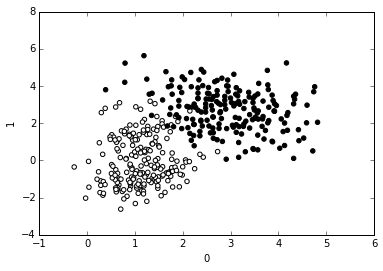

In [23]:
data3.plot(x=0, y=1, kind='scatter', c=data3[2])

In [24]:
run_data(data_array3)

Running test number: 0
PPV: 0.9167, NPV: 0.9167, Specificity: 0.9167, Sensitivity: 0.9167, Accuracy: 0.9167

Running test number: 1
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 2
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 3
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 4
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 5
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 6
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 7
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 8
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number

##### Discussion

The classifier performs a little bit poorly on this dataset in realtion to the last two dataset. I believe this is due to the fact of a little
bit of the intersection of points from both classes as seen in the plot

#### Twospirals Dataset

In [25]:
data4 = pd.read_csv('C:\\Users\\Chux\\Desktop\\Datasets for Pattern Recognition\\twospirals.csv', header = None)

In [26]:
data_array4 = data4.values

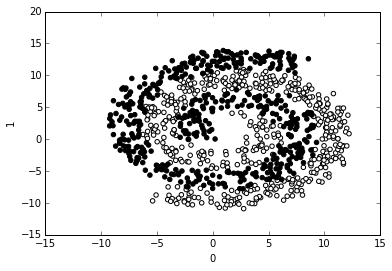

In [27]:
data4.plot(x=0, y=1, kind='scatter', c=data4[2])

In [28]:
run_data(data_array4)

Running test number: 0
PPV: 0.9400, NPV: 0.9400, Specificity: 0.9400, Sensitivity: 0.9400, Accuracy: 0.9400

Running test number: 1
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 2
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 3
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 4
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 5
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 6
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 7
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number: 8
PPV: 1.0000, NPV: 1.0000, Specificity: 1.0000, Sensitivity: 1.0000, Accuracy: 1.0000

Running test number

#### CONCLUSION

We can see from the reults that the classifier performed the very accurately on all datasets.